In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,plot_confusion_matrix



In [ ]:
df=pd.read_csv('/content/data.csv',encoding='unicode_escape')

In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.shape

(112623, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112623 entries, 0 to 112622
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     69557 non-null   object 
 1   sampling_date                112623 non-null  object 
 2   state                        112622 non-null  object 
 3   location                     112622 non-null  object 
 4   agency                       68025 non-null   object 
 5   type                         110994 non-null  object 
 6   so2                          101072 non-null  float64
 7   no2                          108409 non-null  float64
 8   rspm                         99485 non-null   float64
 9   spm                          60731 non-null   float64
 10  location_monitoring_station  103888 non-null  object 
 11  pm2_5                        4249 non-null    float64
 12  date                         112622 non-null  object 
dtyp

In [ ]:
df.isnull().sum()

stn_code                        43066
sampling_date                       0
state                               1
location                            1
agency                          44598
type                             1629
so2                             11551
no2                              4214
rspm                            13138
spm                             51892
location_monitoring_station      8735
pm2_5                          108374
date                                1
dtype: int64

In [ ]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,101072.000000,108409.000000,99485.000000,60731.000000,4249.000000
mean,9.786787,22.581620,100.063819,212.279512,32.435232
std,8.636991,15.635479,64.307981,138.857051,25.360678
min,0.000000,0.000000,0.000000,0.000000,7.000000
25%,5.000000,13.000000,61.000000,127.000000,22.000000
50%,7.100000,19.000000,86.000000,187.000000,29.000000
75%,12.787500,27.100000,120.000000,270.000000,34.000000
max,228.000000,334.900000,1082.000000,2213.000000,318.000000


In [ ]:
df.nunique()

stn_code                        198
sampling_date                  5022
state                            13
location                        105
agency                           21
type                             10
so2                            1163
no2                            1465
rspm                           1425
spm                            2189
location_monitoring_station     280
pm2_5                           245
date                           4861
dtype: int64

In [ ]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [ ]:
nullvalues

pm2_5                          108374
spm                             51892
agency                          44598
stn_code                        43066
rspm                            13138
so2                             11551
location_monitoring_station      8735
no2                              4214
type                             1629
state                               1
location                            1
date                                1
sampling_date                       0
dtype: int64

In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [ ]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data_with_percentage

,Total,Percent
pm2_5,108374,96.227236
spm,51892,46.075846
agency,44598,39.599371
stn_code,43066,38.239081
rspm,13138,11.665468
so2,11551,10.256342
location_monitoring_station,8735,7.755965
no2,4214,3.741687
type,1629,1.446419
state,1,0.000888


In [ ]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

state            1
location         1
type          1629
so2          11551
no2           4214
rspm         13138
spm          51892
pm2_5       108374
dtype: int64

In [ ]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
112618,Himachal Pradesh,Shimla,Residential and others,5.0,6.4,46.0,94.0,NaN
112619,Himachal Pradesh,Shimla,Residential and others,2.4,20.4,47.0,112.0,NaN
112620,Himachal Pradesh,Shimla,Residential and others,NaN,NaN,57.0,98.0,NaN
112621,Himachal Pradesh,Shimla,Residential and others,NaN,5.4,66.0,150.0,NaN


In [ ]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [ ]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
112618,Himachal Pradesh,Shimla,Residential and others,5.0,6.4,46.0,94.0,0.0
112619,Himachal Pradesh,Shimla,Residential and others,2.4,20.4,47.0,112.0,0.0
112620,Himachal Pradesh,Shimla,Residential and others,0.0,0.0,57.0,98.0,0.0
112621,Himachal Pradesh,Shimla,Residential and others,0.0,5.4,66.0,150.0,0.0


In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [ ]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()


,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'].apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
df['AQI_Range'].value_counts()

Good              52662
Poor              33128
Unhealthy         10272
Moderate           8988
Hazardous          3896
Very unhealthy     3677
Name: AQI_Range, dtype: int64

In [ ]:
x = df.iloc[:,8:12]
y = df.iloc[:,12]

In [ ]:
x

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.000000
1,3.875,8.750,0.0,0.000000
2,7.750,35.625,0.0,0.000000
3,7.875,18.375,0.0,0.000000
4,5.875,9.375,0.0,0.000000
...,...,...,...,...
112618,6.250,8.000,0.0,94.000000
112619,3.000,25.500,0.0,108.000000
112620,0.000,0.000,0.0,98.000000
112621,0.000,6.750,0.0,133.333333


In [ ]:
y

0          21.750000
1           8.750000
2          35.625000
3          18.375000
4           9.375000
             ...    
112618     94.000000
112619    108.000000
112620     98.000000
112621    133.333333
112622      0.000000
Name: AQI, Length: 112623, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(84467, 4) (28156, 4) (84467,) (28156,)


REGRESSION ALGORITMS

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
test_pred = lin_reg.predict(x_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE TestData = ",str(RMSE_test))

print('Accuracy on test:', lin_reg.score(x_test, y_test))

RMSE TestData =  10.789181024204957
Accuracy on test: 0.9900441855155646


In [ ]:
RF = RandomForestRegressor().fit(x_train,y_train)
test_preds1=RF.predict(x_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE TestData = ", str(RMSE_test))

print('Accuracy on test:', RF.score(x_test, y_test))

RMSE TestData =  1.321589382477995
Accuracy on test: 0.9998506198409655


CLASSIFICATION ALGORITHMS

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [ ]:
x2 = df[['SOi','Noi','Rpi','SPMi']]
y2 = df['AQI_Range']

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=70)

Model accuracy on test is:  0.9736856266480116
Confusion Matrix:


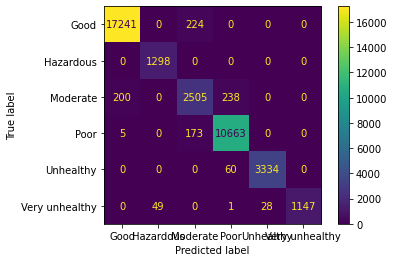

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

svc = SVC(kernel='linear', random_state=0 )
svc.fit(x_train2, y_train2)
y_pred = svc.predict(x_test2)
print("Model accuracy on test is: ", accuracy_score(y_test2, y_pred))

print("Confusion Matrix:")
plot_confusion_matrix(svc, x_test2, y_test2)

Model accuracy on test is:  0.7540224936770167
Confusion Matrix: 


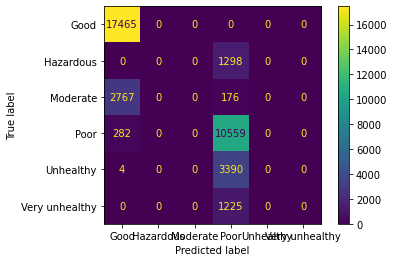

In [ ]:
BNB = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
BNB.fit(x_train2, y_train2)
y_pred = BNB.predict(x_test2)

print("Model accuracy on test is: ", metrics.accuracy_score(y_test2, y_pred))

print("Confusion Matrix: ")
plot_confusion_matrix(BNB, x_test2, y_test2)

Model accuracy on test is:  0.9998654684388958
Confusion Matrix: 


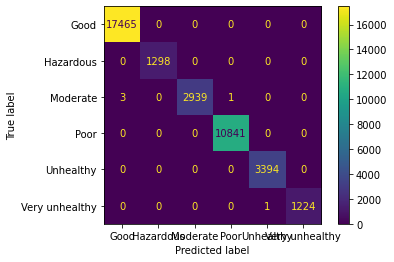

In [ ]:
DT = DecisionTreeClassifier().fit(x_train2,y_train2)
test_preds3 = DT.predict(x_test2)
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds3))

print("Confusion Matrix: ")
plot_confusion_matrix(DT, x_test2, y_test2)

Model accuracy on test is:  0.9998385621266749
Confusion Matrix: 


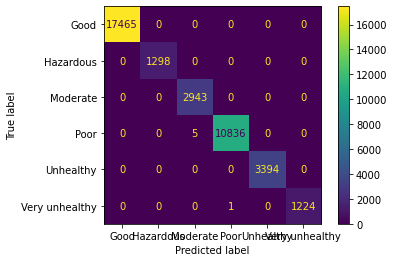

In [ ]:
RF=RandomForestClassifier().fit(x_train2,y_train2)
test_preds4 = RF.predict(x_test2)
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds4))

print("Confusion Matrix: ")
plot_confusion_matrix(RF, x_test2, y_test2)

Model accuracy on test is:  0.9860894365818221
Confusion Matrix: 


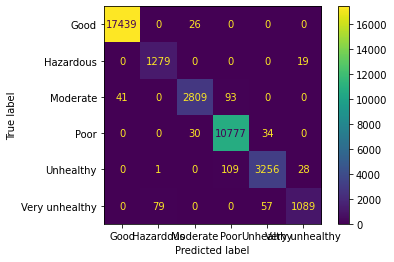

In [ ]:
KNN = KNeighborsClassifier().fit(x_train2,y_train2)
test_preds5 = KNN.predict(x_test2)
print("Model accuracy on test is: ", accuracy_score(y_test2, test_preds5))

print("Confusion Matrix: ")
plot_confusion_matrix(KNN, x_test2, y_test2)